### Student Information
Name: 留筠雅

Student ID: 711233112

GitHub ID: sue6609

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [229]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### PART2 : Analyze the new dataset

### 1. Data Preparation

In [230]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df.head()

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

In [231]:
df.sentiment.unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

In [232]:
# Map y to a binary value 
df["sentiment_num"] = df.sentiment.map({'nostalgia': 0, 'not nostalgia': 1})

In [233]:
len(df)

1500

In [234]:
# An example of what the subset contains
for comment in df["comment"]:
    print("\n".join(comment.split(".")))
    print("-" * 100)

He was a singer with a golden voice that I love to hear all the time
 I was his great fan at the age of 16years in those days and still now
 Although we have many singers now, but, I can vouch for Jim Reeves all the time
 You feel relaxed, emotional and loving
 Thank you Lord for his life

----------------------------------------------------------------------------------------------------
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
----------------------------------------------------------------------------------------------------
I have most of Mr
 Reeves songs
  Always love his smooth voice, so comforting and sounds like the people I grew up around
  They were so gentle and sweet, but I had to leave my little town to find a job at age 17
  I graduated early
  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is

-------

### Check missing values

In [235]:
# check missing values
df.isnull().sum()
# There are no missing values in the dataset.

sentiment        0
comment          0
sentiment_num    0
dtype: int64

### check duclpicate values

In [236]:
#check duclpicate values
sum(df.duplicated("comment"))


1

In [237]:
#recall duclpicate data 
df[df.duplicated("comment", keep=False)]

#drop duclpicate data
df = df.drop_duplicates("comment")
len(df)

1499

### 2.　Data Preprocessing
### Sampling

In [238]:
#sampling
df_sample = df.sample(n=1000, random_state=42)

counts_df = df['sentiment'].value_counts()
print("Original data:", counts_df/sum(counts_df))

counts_df_sample = df_sample['sentiment'].value_counts()
print("Sampling data:", counts_df_sample/sum(counts_df_sample))

#we can see that is a balanced dataset

Original data: sentiment
nostalgia        0.500334
not nostalgia    0.499666
Name: count, dtype: float64
Sampling data: sentiment
not nostalgia    0.502
nostalgia        0.498
Name: count, dtype: float64


### Plot a bar chart to visualize the distribution

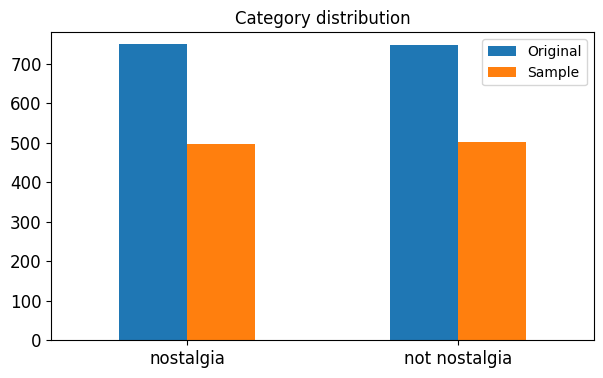

In [239]:
ymax = max(counts_df.max(), counts_df_sample.max()) + 30
pd.concat([counts_df, counts_df_sample], axis = 1).plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, ymax], 
                                           rot = 0, fontsize = 12, figsize = (7,4), xlabel="")
plt.legend(["Original", "Sample"])
plt.show()

### Feature Creation

In [240]:
import nltk
import helpers.data_mining_helpers as dmh
# In this code, "text" is first split into sentences and then further split into words.
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [241]:
df.head()

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   

   sentiment_num                                           unigrams  
0              1  [He, was, a, singer, with, a, golden, voice, t...  
1              0  [The, mist, beautiful, voice, ever, I, listene...  
2              0  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3              1  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4              0  [listening, to, his, songs, reminds, me, of, m...

 ### Feature subset selection
 

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() # #Mainly used to convert text into a word frequency matrix (i.e. the number of times a word appears in each document)
df_counts = count_vect.fit_transform(df.comment) # learn the vocabulary and return document-term matrix
print(df_counts[0])
print(df_counts.shape) # (1499, 3730) -> 1499 documents and 3730 terms
# (0, 1598)    1 -> 0th document has 1 count of the word that appears at the 1598th index


  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

### Exploring the relationship between the 20 most frequent words and the first 20 documents

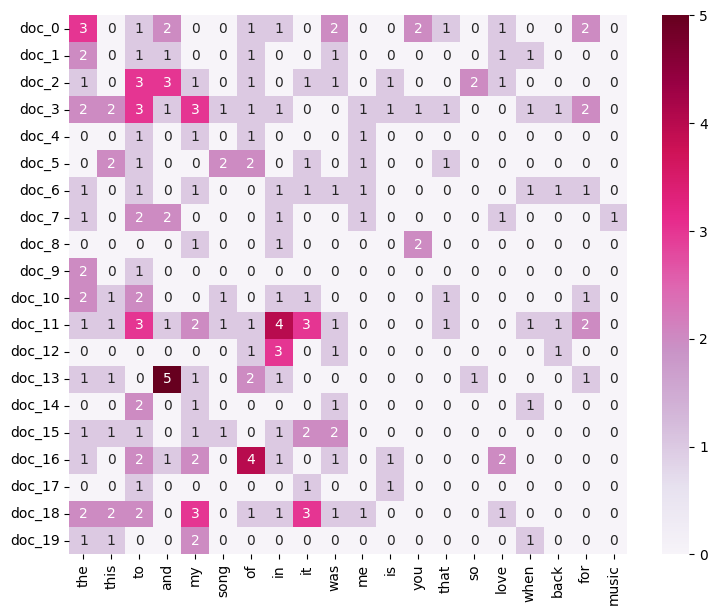

In [243]:
# What I want to show is to see the relationship between the 20 most frequent words and the first 20 files
term_frequencies = np.asarray(df_counts.sum(axis=0)).flatten() # The frequency of each terms
reverse_order = np.argsort(term_frequencies)[::-1] # Sort the term frequencies from largest to smallest
count_vect.get_feature_names_out()[reverse_order][:20]# The top 20 most frequent terms
plot_x = count_vect.get_feature_names_out()[reverse_order][:20] 

plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]# obtain document index

plot_z = df_counts[0:20, reverse_order[:20]].toarray() # only utilize the first 20 terms for the graph
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)#plot the graph 
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=df_counts[0:20, reverse_order[:20]].toarray().max(), annot=True)

### Visualizing term frequencies with a bar chart using plotly
- Plotly allows users to zoom, pan, and hover over data points for detailed information.


In [244]:
import seaborn as sns
import plotly.graph_objs as go


colors = sns.color_palette("Spectral", 300)  
hex_colors  = [f'#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}' for r, g, b in colors]
#help(plotly.graph_objs) 
x_value = count_vect.get_feature_names_out()[:300]  
y_value = term_frequencies[:300]

fig = go.Figure(data = [
        go.Bar(name='term frequencies', x=x_value, y=y_value, marker=dict(color=hex_colors))
    ])
fig.show()


### Filter out words with too low frequency

In [245]:
# We create a filter with a threshold of 50 and keep only the term_frequencies greater than 50
filter_index = [i for i, j in enumerate(term_frequencies) if j > 50] # i is the index of term_frequencies greater than 50

filter_terms = count_vect.get_feature_names_out()[filter_index] # terms with term_frequencies greater than 50
filter_y_value = term_frequencies[filter_index] # frequencies of term_frequencies greater than 50
# Create a bar chart
fig = go.Figure(data=[
        go.Bar(name='term frequencies', x=filter_terms, y=filter_y_value)
    ])
fig.show()
print(len(filter_terms)) # The number of single words is less than the number in the picture above.

124


### Plot the top 200 terms and their frequencies

In [246]:
# Answer here

reverse_order = np.argsort(term_frequencies)[::-1] # Sort the term frequencies from largest to smallest

top_terms = count_vect.get_feature_names_out()[reverse_order[:200]]

fig = go.Figure(data = [
        go.Bar(name='top term frequencies', x=top_terms, y=term_frequencies[reverse_order[:200]], marker=dict(color=hex_colors))
    ])
fig.show()
# we can see some patterns in the data, the frequency of words before "was" decreased very quickly, and then it slowed down.

### Log transformation can compress the range of the data, especially when there is a large span in the data values.

In [247]:

import math
term_frequencies_log = [math.log(i) for i in term_frequencies] # Take the natural log of the term frequency

reverse_order = np.argsort(term_frequencies)[::-1] # Sort the term frequencies from largest to smallest
y = [term_frequencies_log[i] for i in reverse_order[:200]] # Take the natural log of the top 200 highest frequencies

top_terms = count_vect.get_feature_names_out()[reverse_order[:200]] # Return the top 200 terms with the highest frequencies

fig = go.Figure(data = [
        go.Bar(name='top term frequencies(log)', x=top_terms, y=y, marker=dict(color=hex_colors))
    ])
fig.show() 

In [248]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs  = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
   filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [249]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs [categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

###  Finding frequent patterns
- By analyzing frequent patterns, we can identify the words or themes that are commonly mentioned in nostalgic/ not nostalgic comments.

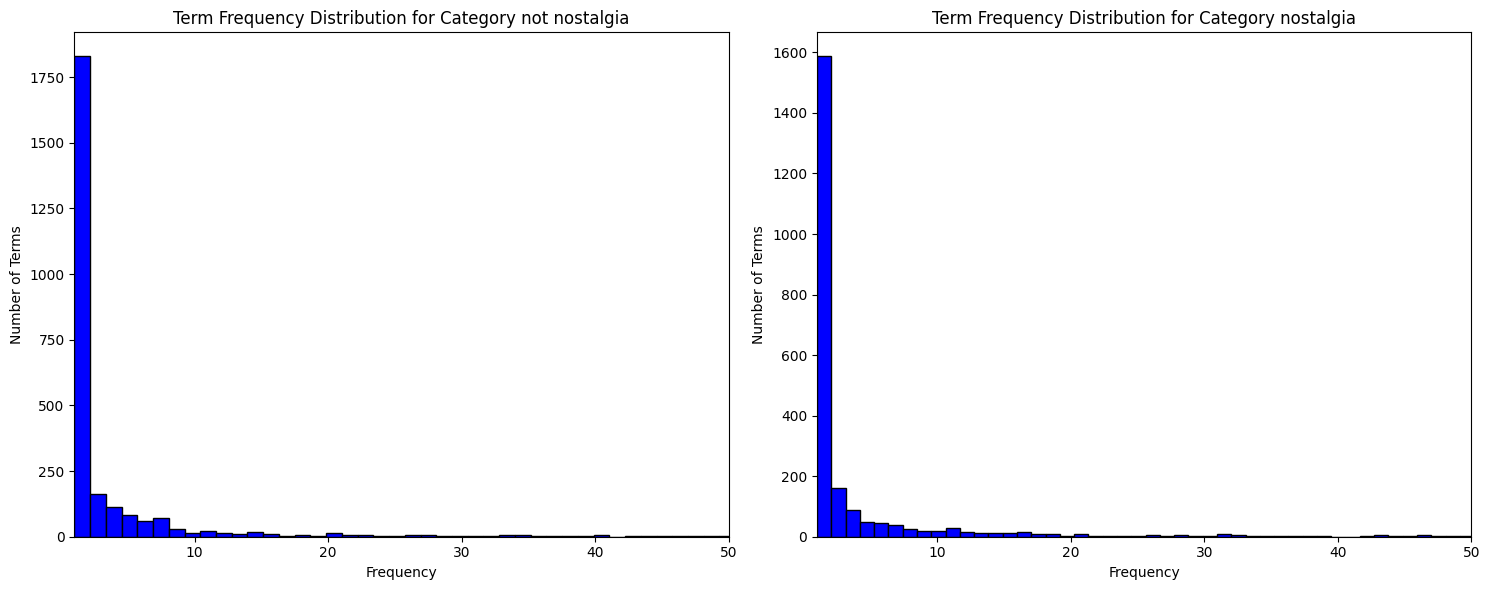

In [250]:

category_numbers = [0, 1] 

fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create a figure and a set of subplots


for idx, category_number in enumerate(category_numbers):
     # Sum over all documents to get total frequency for each word
    word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
    
    # Plot the histogram
    axs[idx].hist(word_counts, bins=600, color='blue', edgecolor='black')
    axs[idx].set_title(f'Term Frequency Distribution for Category {categories[category_number]}')
    axs[idx].set_xlabel('Frequency')
    axs[idx].set_ylabel('Number of Terms')
    axs[idx].set_xlim(1, 50)


plt.tight_layout()
plt.show()
# Regardless of the category, there are a lot of words with frequencies ranging from 0 to 1.

### It was found that regardless of the category, and excluding functional words, the top 5% frequent terms include words like 'song', 'love', and 'music'.

In [251]:
category_numbers = [0, 1] 

for category_number in category_numbers:

    word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
    sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)

    # Get the indices of the top 5% most frequent terms
    top_5_percent_indices = sorted_indices[:top_5_percent_index]

    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'can', 'me', 'voice', 'just', 'songs', 'beautiful', 'as', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'never', 'now', 'about', 'much', 'who', 'really', 'more', 'if', 'we', 'best', 'by', 'ever', 'think', 'would', 'thank', 'only', 'still', 'how', 'don', 'has', 'very', 'am', 'there', 'out', 'him', 'could', 'these', 'up', 'old', 'listen', 'hear', 'do', 'an', 'singer', 'many', 'had', 'here', 'version', 'too', 'such', 'today', 'been', 'world', 'your', 'people', 'most', 'get', 'video', 'heard', 'man', 'some', 'listening', 'sing', 'than', 'were', 'years', 'real', 'heart', 'nice', 'singing', 'their', 'better', 'life', 'its', 'day', 'sad', 'god', 'then', 'way', '

### Words related to time, such as years, are likely to fall into the bottom 1% of the least frequent terms. This may be due to the abundance of different years.

In [252]:
for category_number in category_numbers:

    # Sort the term frequencies in ascending order and get sorted indices
    sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
    sorted_counts = word_counts[sorted_indices]  # Sort frequencies

    # Calculate the index corresponding to the bottom 1% least frequent terms
    total_terms = len(sorted_counts)
    bottom_1_percent_index = int(0.01 * total_terms)

    # Get the indices of the bottom 1% least frequent terms
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

    # Filter terms that belong to the bottom 1% based on their rank
    filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['there', 'then', 'theme', 'the', 'thanks', 'thank', '18', '17', '1963', '1957', 'just', 'pop', 'poor', 'political', 'president', 'joint', 'number', 'nuance', '27', 'though', '16years', '10']
Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yo', 'yet', 'yester', 'yeas', 'yearn', 'yeah', '1952', '1950', '1969', '1964', 'lp', 'safety', 'safer', 'saddest', 'seeing', 'lou', 'proud', 'protest', '2002', 'yup', '1927', '11th']


In [253]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

In [254]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483




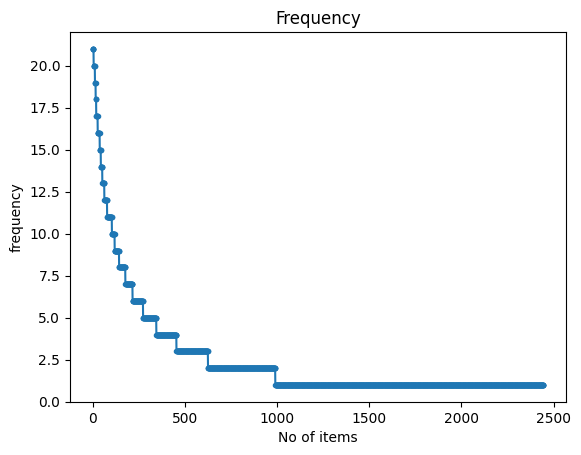

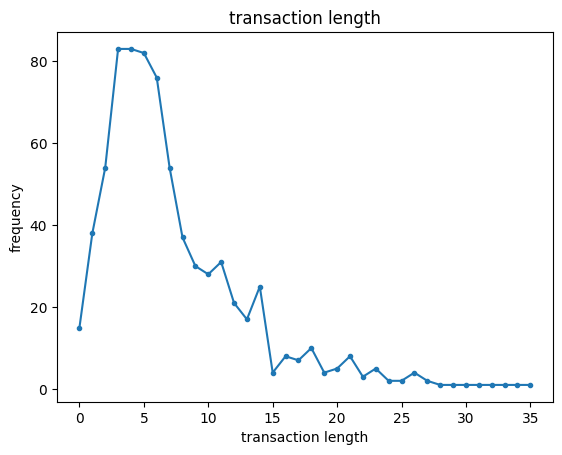

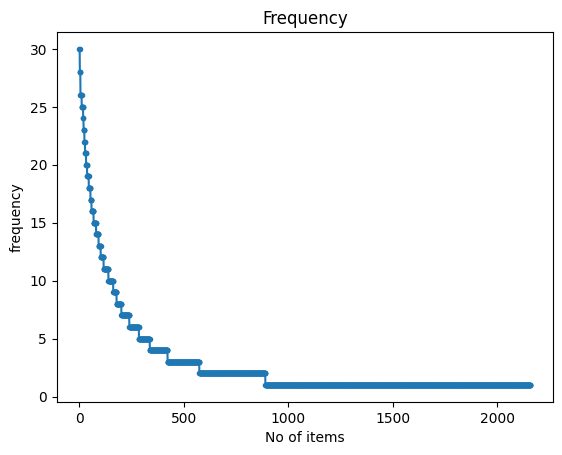

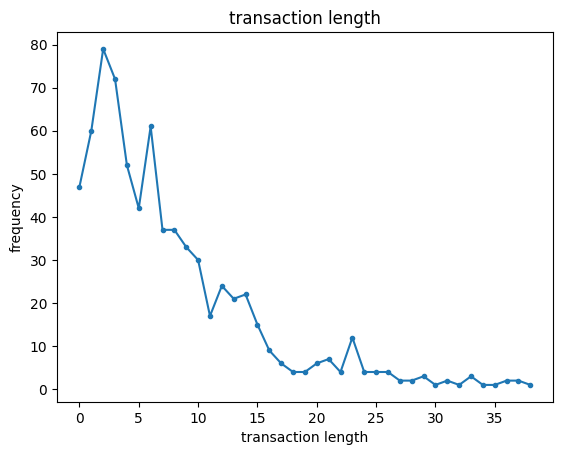

In [255]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
for category in categories:
    category_safe = category.replace('.', '_')
    obj = tds.TransactionalDatabase(f'td_freq_db_{category_safe}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()
    print('\n')

In [256]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 938
Runtime: 0.025990962982177734


In [257]:
obj1.save('freq_patterns_nostalgia_minSup3.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        forgot        3
1            mr        3
2    appreciate        3
3         death        3
4     death jim        3
..          ...      ...
933        ever       28
934       would       28
935          go       28
936       takes       30
937    favorite       30

[938 rows x 2 columns]

In [258]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.0200040340423584


In [259]:
obj2.save('freq_patterns_not_nostalgia_minSup3.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        forgot        3
1            mr        3
2    appreciate        3
3         death        3
4     death jim        3
..          ...      ...
933        ever       28
934       would       28
935          go       28
936       takes       30
937    favorite       30

[938 rows x 2 columns]

In [260]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for i in dfs:
    for pattern in i['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(i) for i in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for i in dfs:
    filtered_df = i[i['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
1041      would       28
1040       ever       28
1030       only       26
1037       wish       26
1028        kid       26
...         ...      ...
994    long has        3
993   long ever        3
32        touch        3
31      soulful        3
1009   has only        3

[1042 rows x 2 columns]
Number of patterns discarded: 626


In [261]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['comment'])  # df['comment'] contains your text data (Term-Document Matrix)
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words ex: doc1 = {"a","b","c"}
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix (1499, 1042)
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words ex:{"word"}
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  year or  child such  \
0      0    0    0   0   0    0    0   0     0   0  ...        0           0   
1      0    0    0   0   0    0    0   0     0   0  ...        0           0   
2      0    0    0   0   0    0    0   0     0   0  ...        0           0   
3      0    0    0   0   0    0    0   0     0   0  ...        0           0   
4      0    0    0   0   0    0    0   0     0   0  ...        0           0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...         ...   
1495   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1496   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1497   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1498   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1499   0    0    0   0   0    0    0   0     0   0  ...        0           0   

      anymore gonna sun ain shine  sad by  gonna sun ain shine  long has  \
0                               0       0                    0         0   
1                               0       0                    0         0   
2                               0       0                    0         0   
3                               0       0                    0         0   
4                               0       0                    0         0   
...                           ...     ...                  ...       ...   
1495                            0       0                    0         0   
1496                            0       0                    0         0   
1497                            0       0                    0         0   
1498                            0       0                    0         0   
1499                            0       0                    0         0   

      long ever  touch  soulful  has only  
0             0      0        0         0  
1             0      0        0         0  
2             0      0        0         0  
3             0      0        0         0  
4             0      0        0         0  
...         ...    ...      ...       ...  
1495          0      0        0         0  
1496          0      0        0         0  
1497          0      0        0         0  
1498          0      0        0         0  
1499          0      0        0         0  

[1499 rows x 4772 columns]

### Dimensionality Reduction

In [262]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

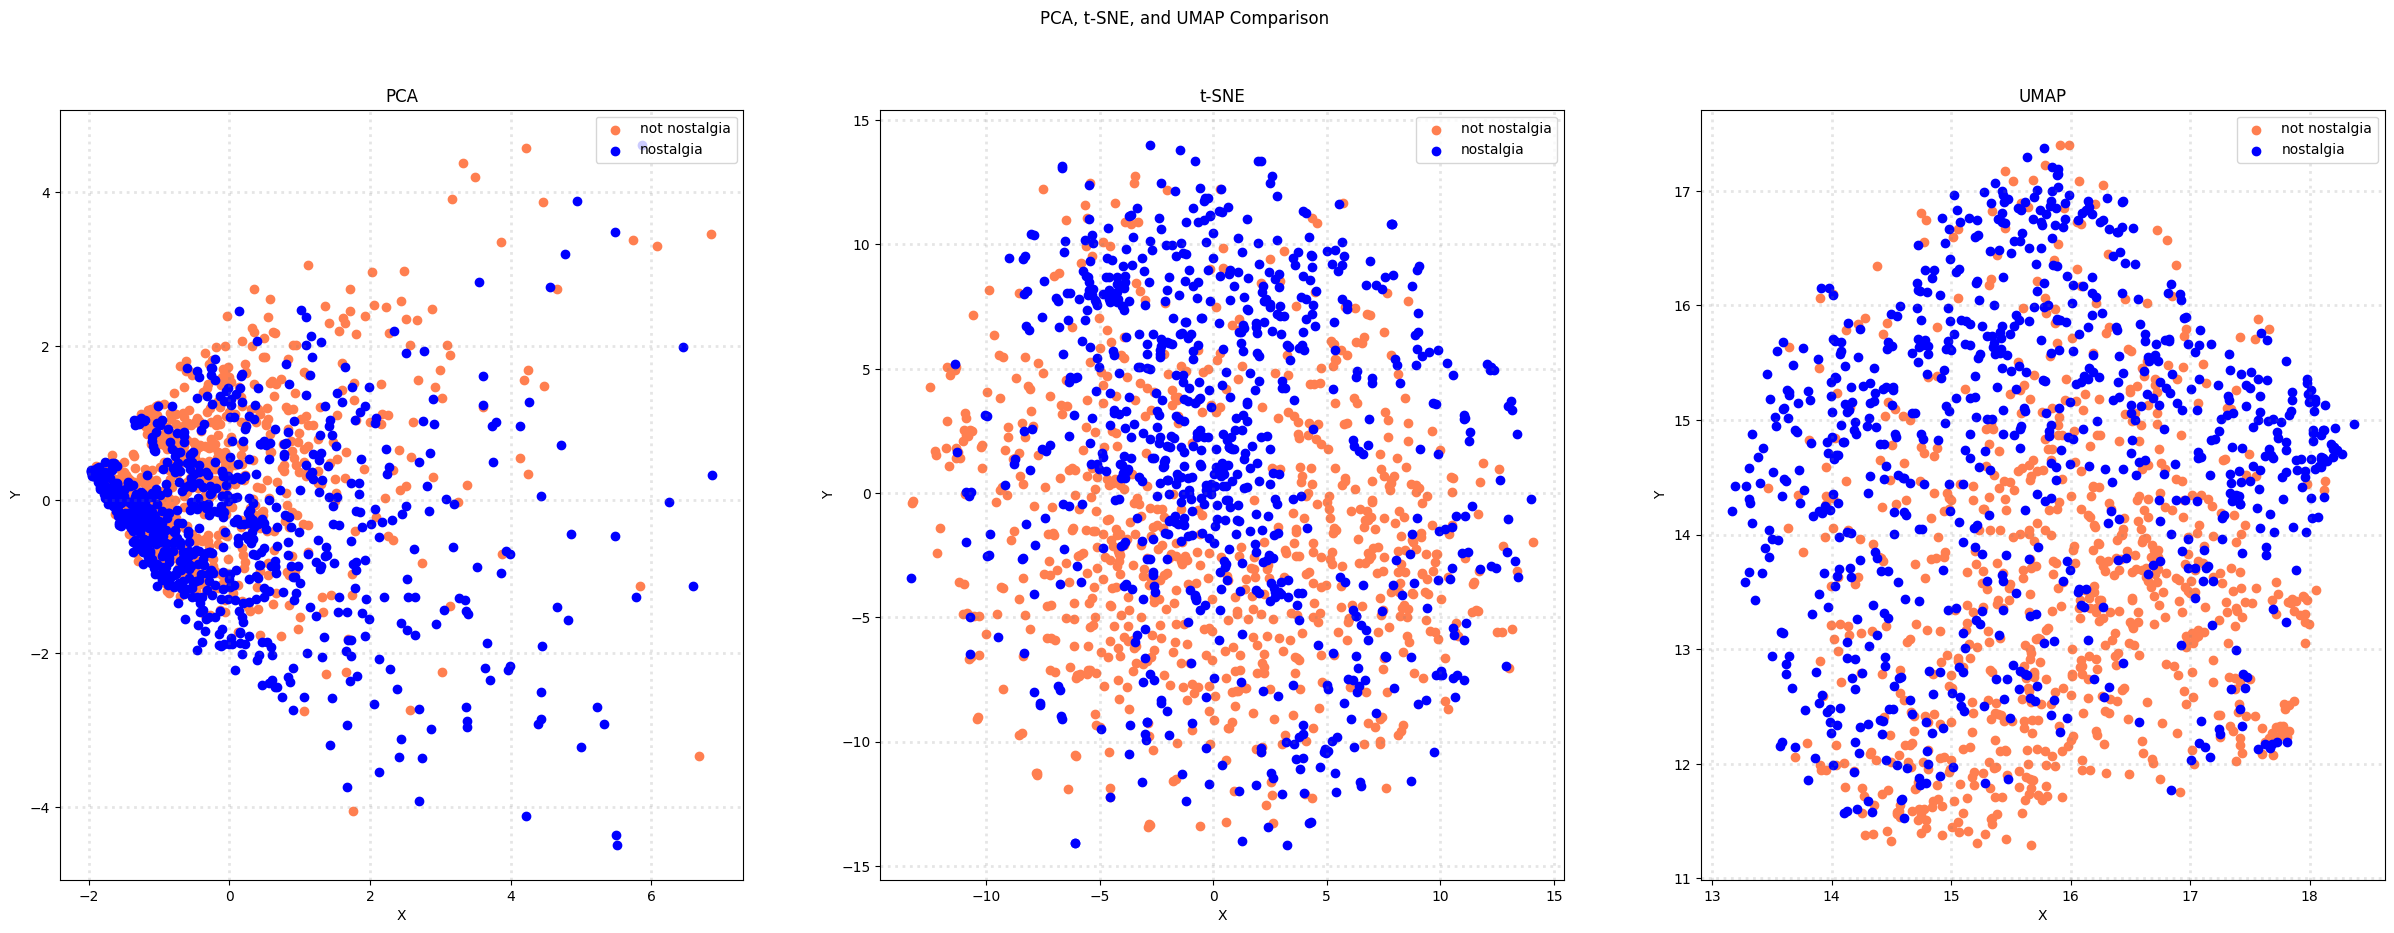

In [263]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')



From the 2D PCA visualization, it appears that if we do not differentiate between nostalgic and non-nostalgic categories and instead look at the overall picture, there seem to be three distinct groups. Does this indicate the presence of non-sentiment variables that might be causing significant differences in the data and potentially revealing certain underlying structures or patterns?

In [264]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
df_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

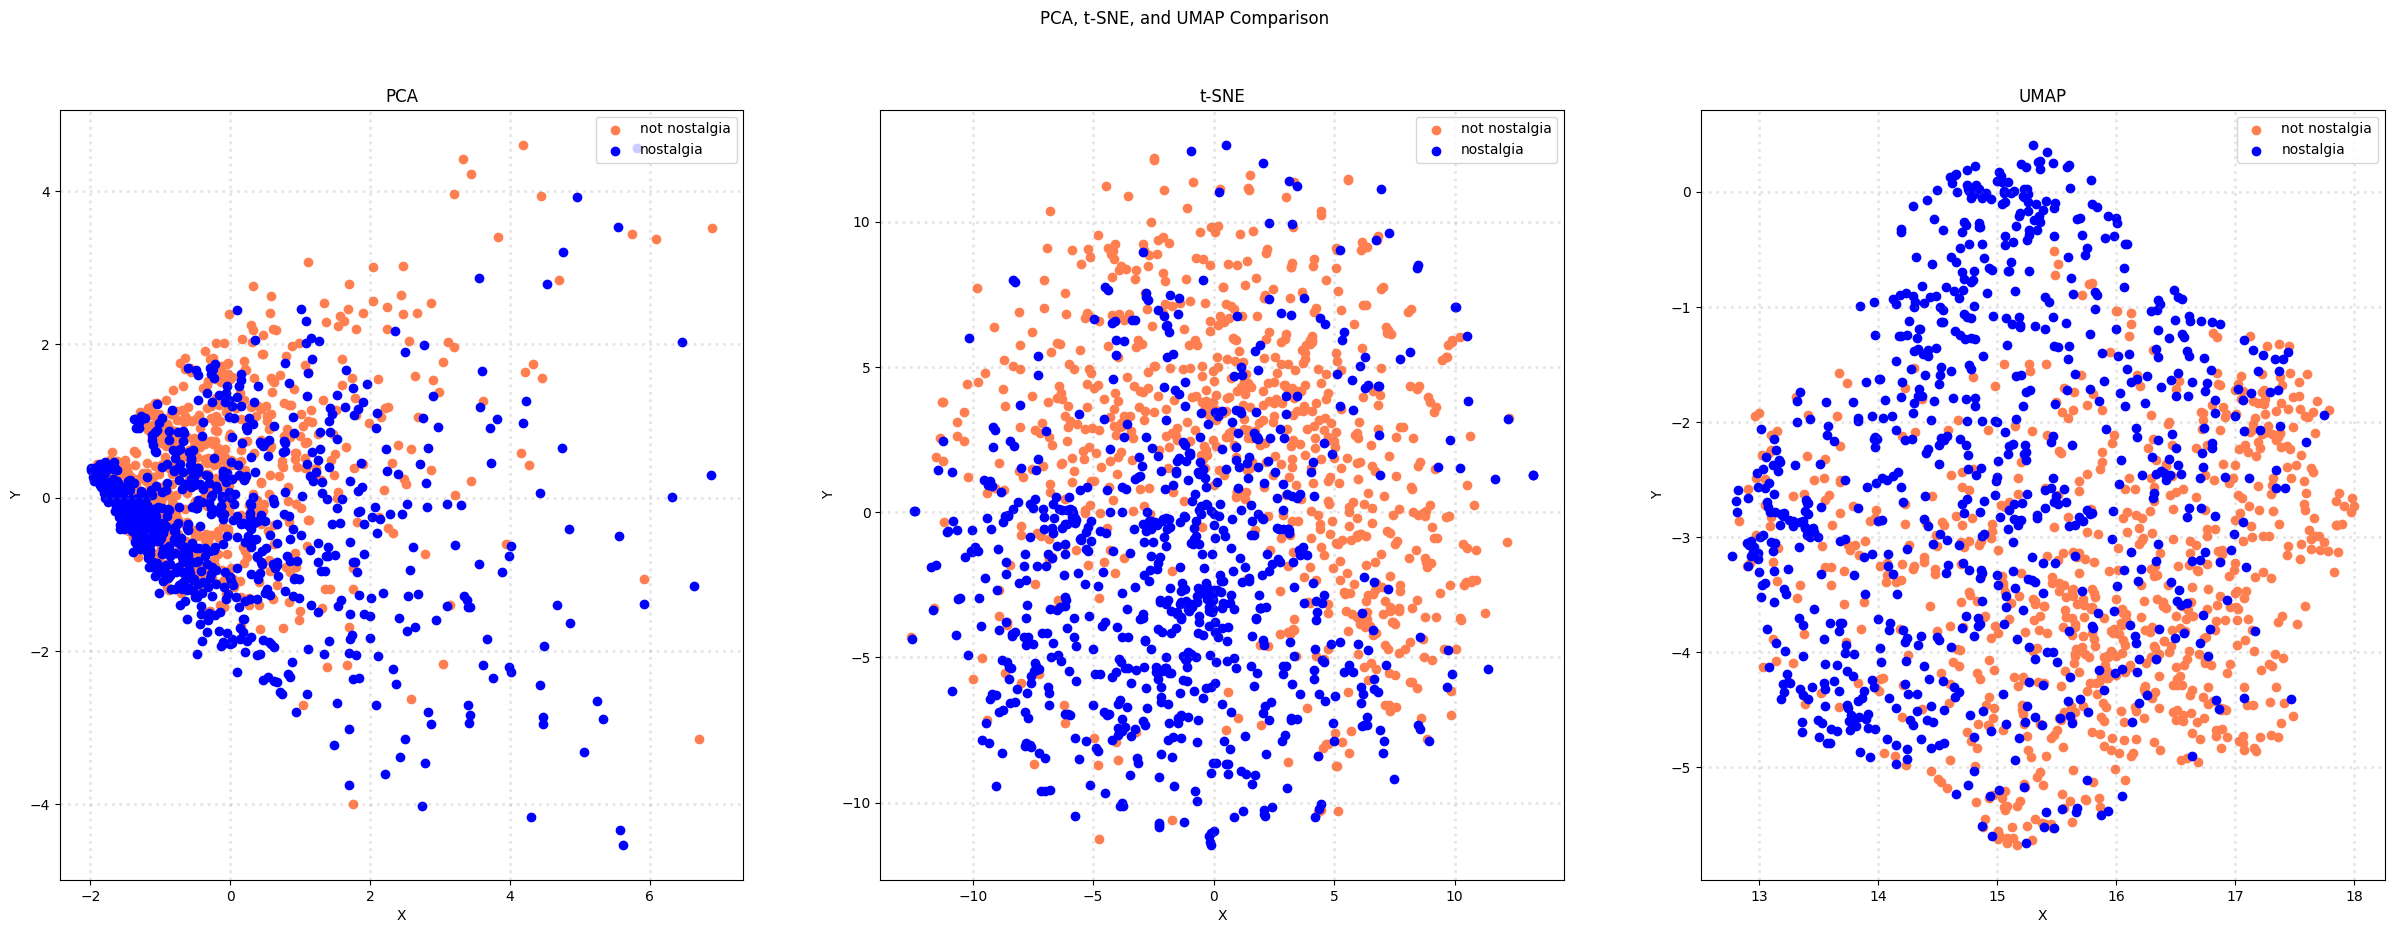

In [265]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_aug, 'PCA')
plot_scatter(axes[1], df_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_umap_aug, 'UMAP')

In [266]:
df_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

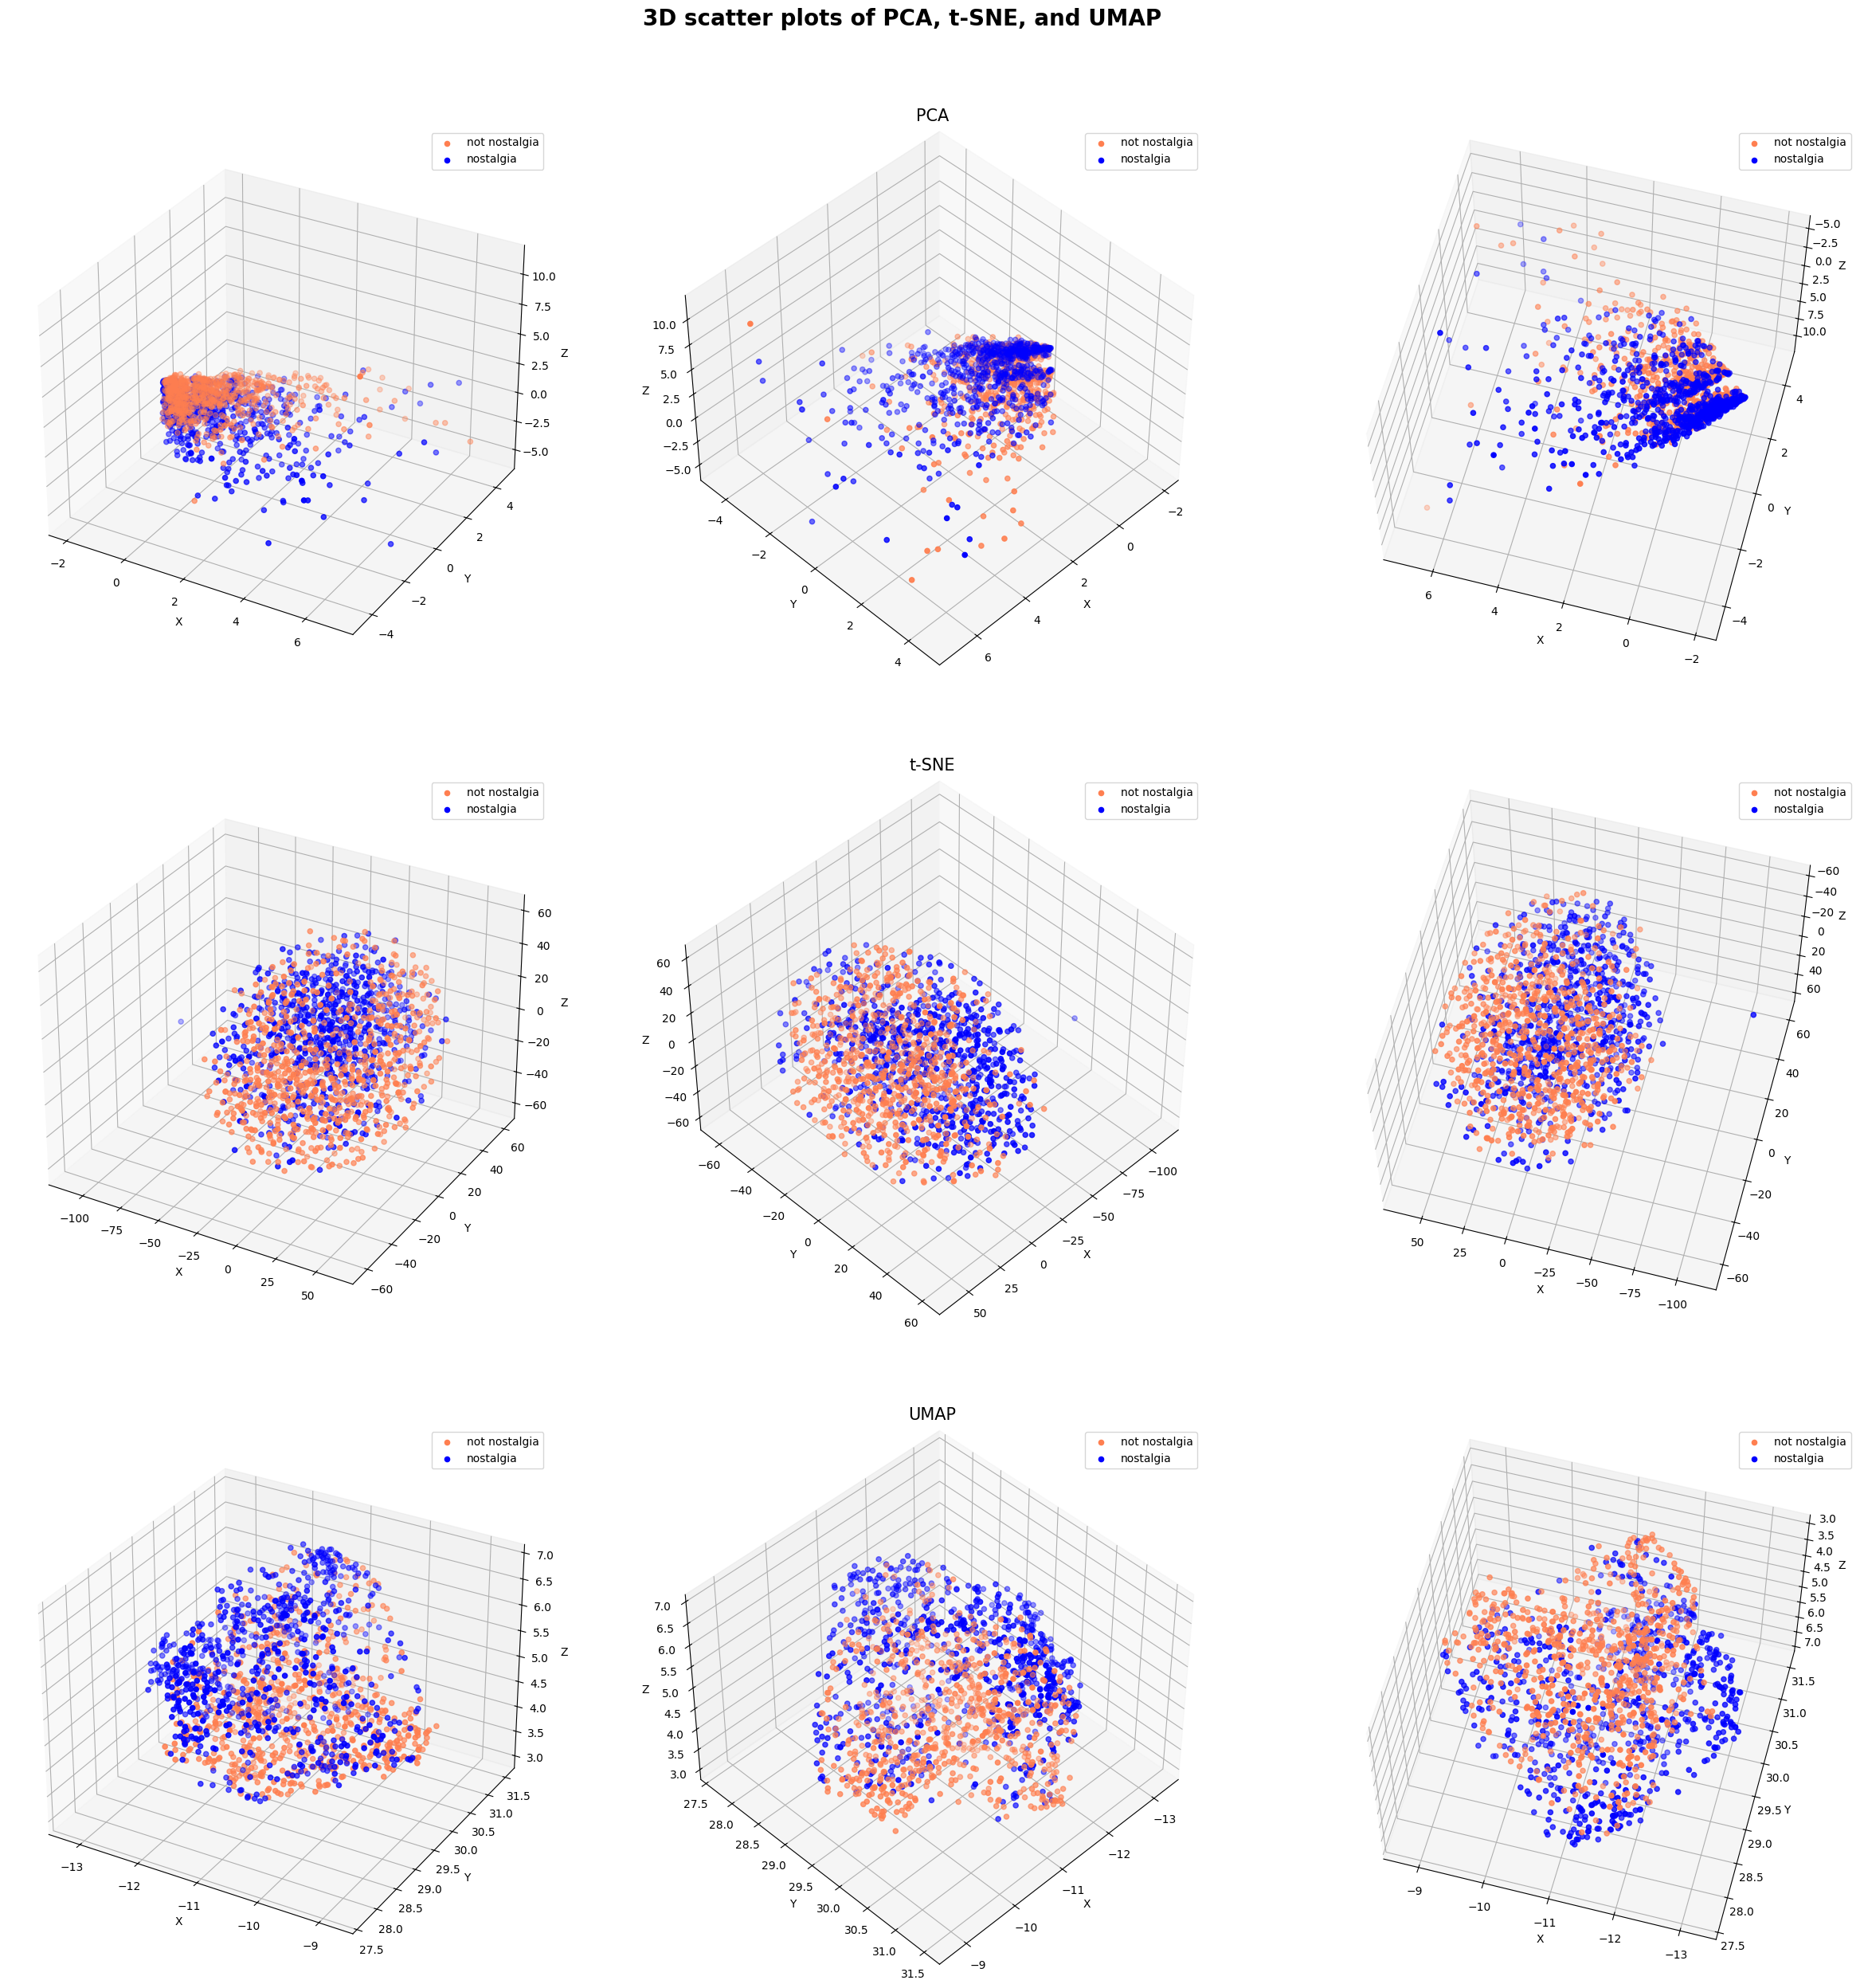

In [267]:
# Answer here

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig = plt.figure(figsize=(30, 30))
axes = [fig.add_subplot(331, projection='3d'), 
        fig.add_subplot(332, projection='3d'), 
        fig.add_subplot(333, projection='3d'),
        fig.add_subplot(334, projection='3d'),
        fig.add_subplot(335, projection='3d'),
        fig.add_subplot(336, projection='3d'),
        fig.add_subplot(337, projection='3d'),
        fig.add_subplot(338, projection='3d'),
        fig.add_subplot(339, projection='3d')]

# Iterate over the axes to set up scatter plots
for ax in axes[:3]:
    for c, category in zip(col, categories):
        xs = df_pca_tdm[df['sentiment'] == category].T[0]
        ys = df_pca_tdm[df['sentiment'] == category].T[1]
        zs = df_pca_tdm[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Set specific view angles for each subplot
axes[1].view_init(elev=45, azim=45)
axes[2].view_init(elev=-120, azim=75)

for ax in axes[3:6]:
    for c, category in zip(col, categories):
        xs = df_tsne_tdm[df['sentiment'] == category].T[0]
        ys = df_tsne_tdm[df['sentiment'] == category].T[1]
        zs = df_tsne_tdm[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
axes[4].view_init(elev=45, azim=45)
axes[5].view_init(elev=-120, azim=75)
for ax in axes[6:9]:
    for c, category in zip(col, categories):
        xs = df_umap_tdm[df['sentiment'] == category].T[0]
        ys = df_umap_tdm[df['sentiment'] == category].T[1]
        zs = df_umap_tdm[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
axes[7].view_init(elev=45, azim=45)
axes[8].view_init(elev=-120, azim=75)

plt.suptitle("3D scatter plots of PCA, t-SNE, and UMAP", fontsize=20, fontweight='bold' ,y=0.93)
axes[1].set_title("PCA",fontsize=15)
axes[4].set_title("t-SNE",fontsize=15)
axes[7].set_title("UMAP",fontsize=15)

plt.show()

In [268]:
df_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

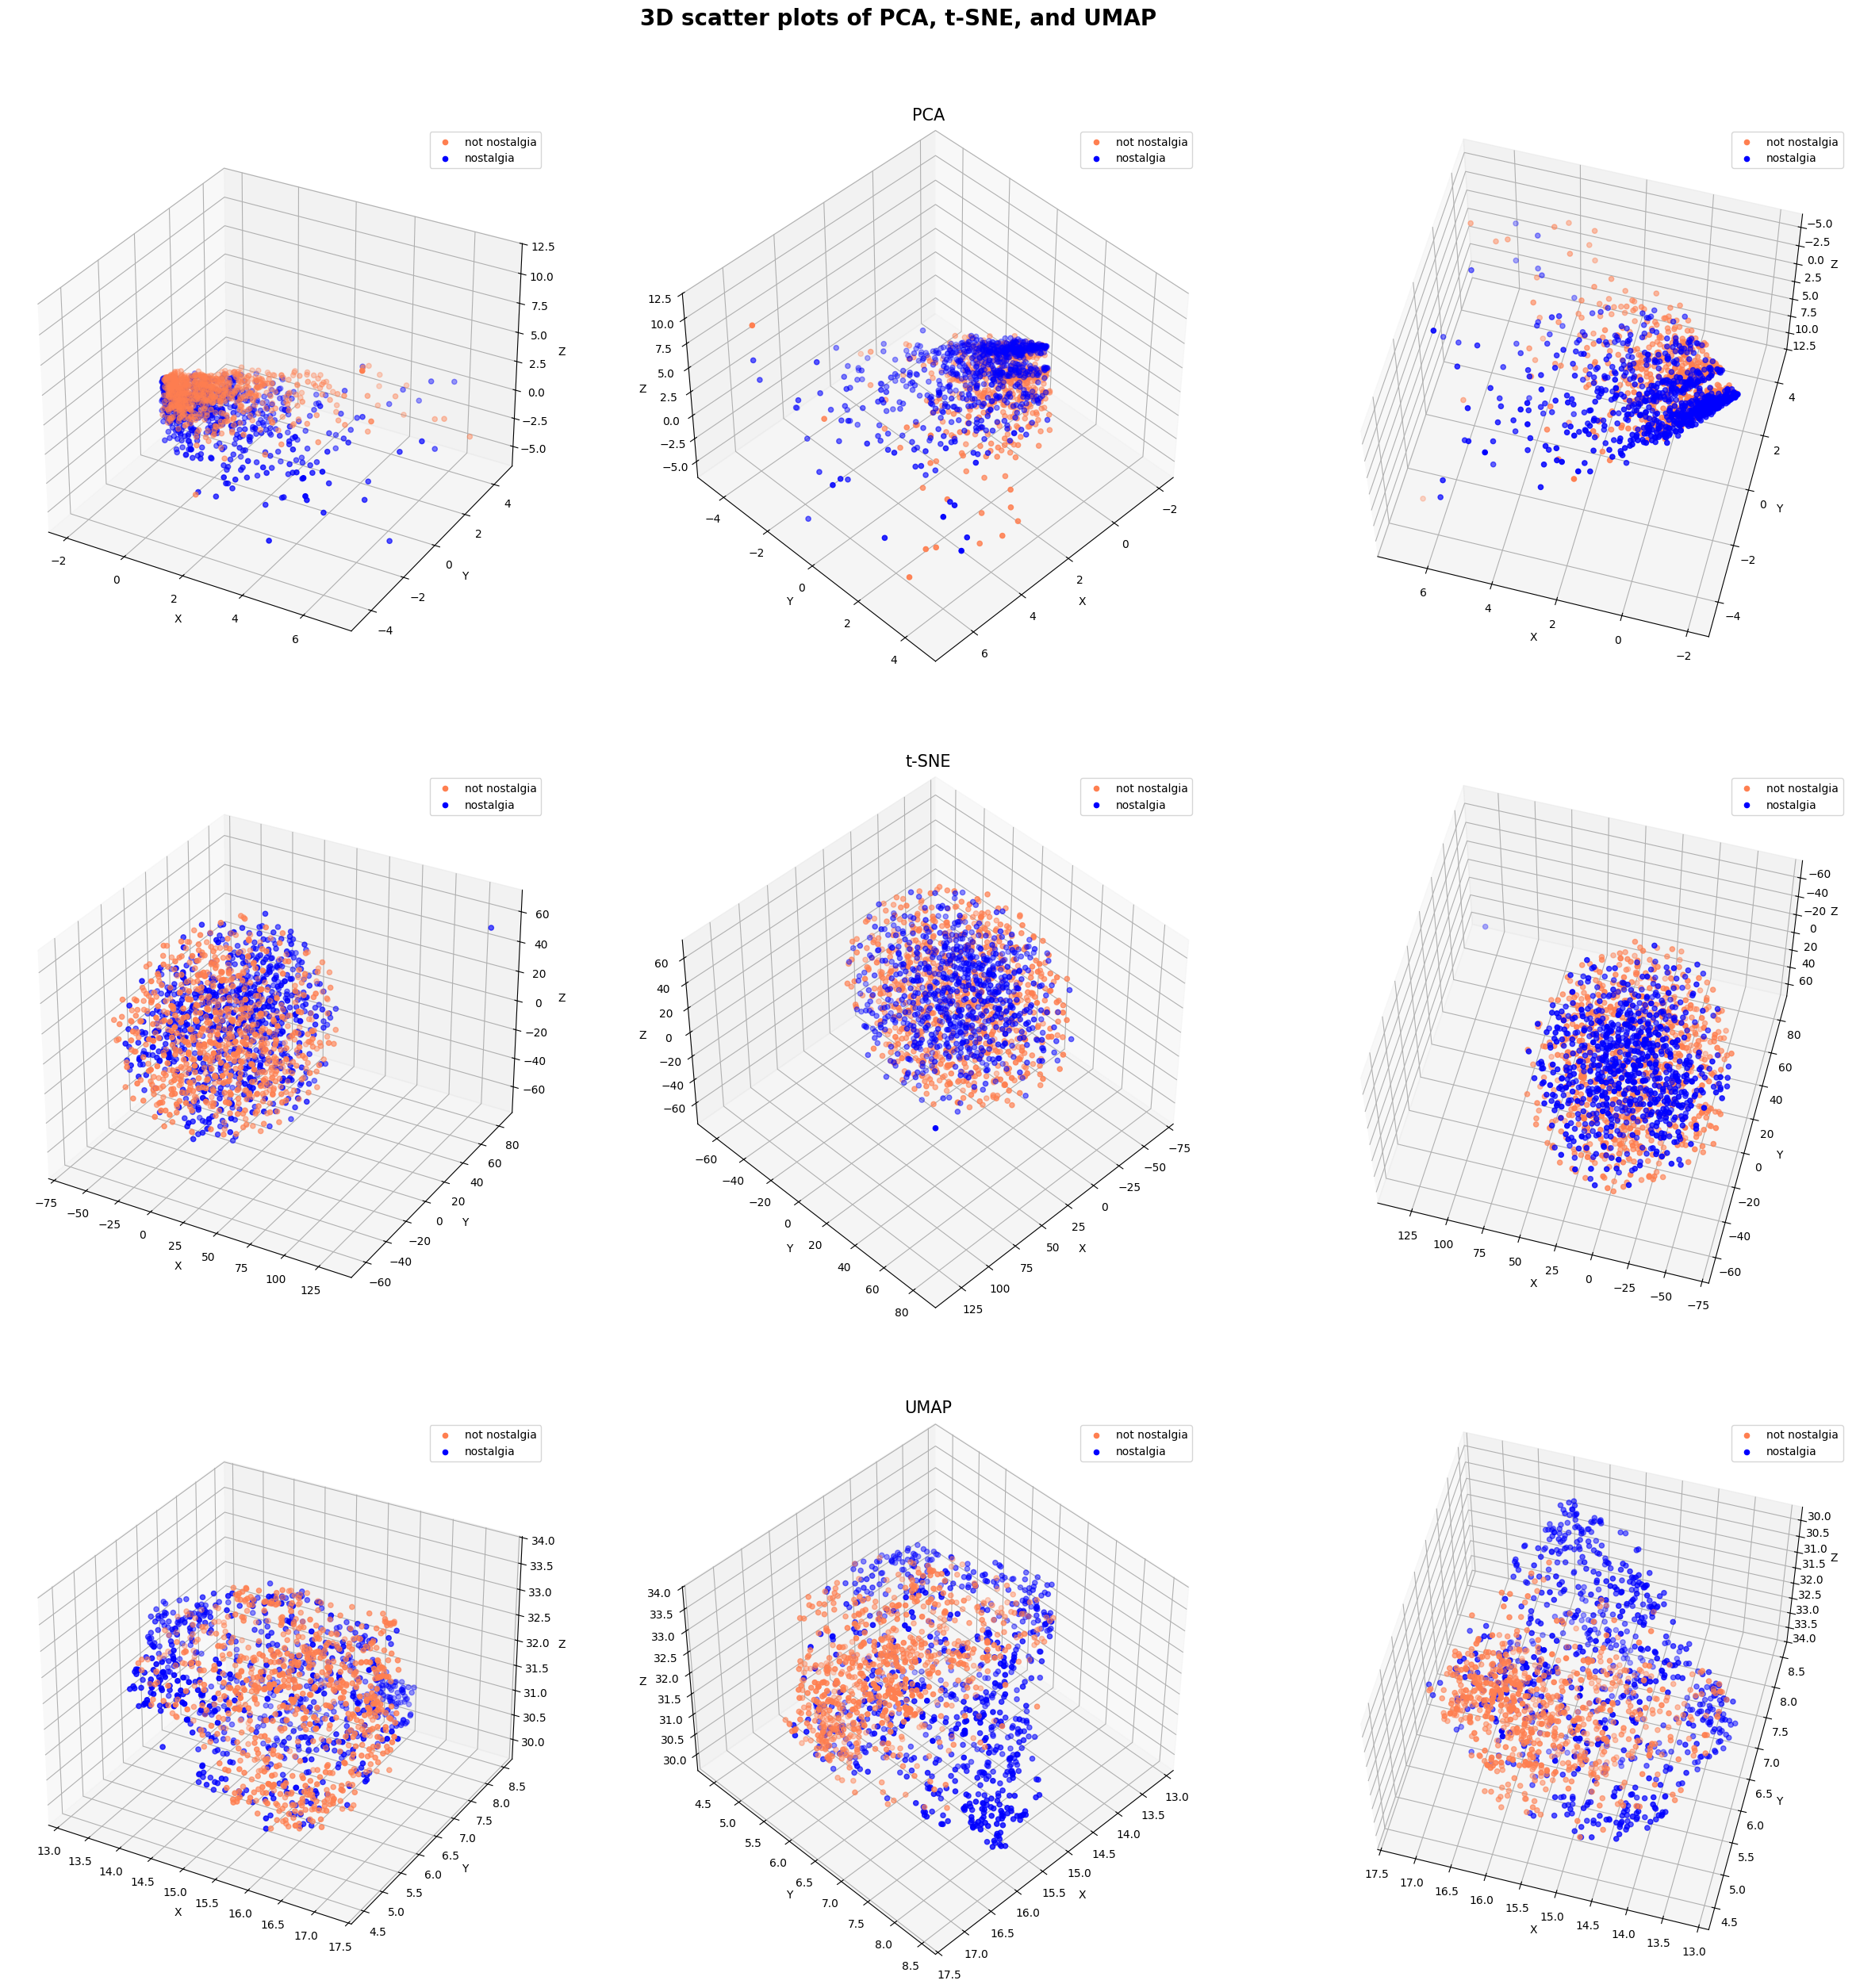

In [269]:
# Answer here

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig = plt.figure(figsize=(30, 30))
axes = [fig.add_subplot(331, projection='3d'), 
        fig.add_subplot(332, projection='3d'), 
        fig.add_subplot(333, projection='3d'),
        fig.add_subplot(334, projection='3d'),
        fig.add_subplot(335, projection='3d'),
        fig.add_subplot(336, projection='3d'),
        fig.add_subplot(337, projection='3d'),
        fig.add_subplot(338, projection='3d'),
        fig.add_subplot(339, projection='3d')]

# Iterate over the axes to set up scatter plots
for ax in axes[:3]:
    for c, category in zip(col, categories):
        xs = df_pca_aug[df['sentiment'] == category].T[0]
        ys = df_pca_aug[df['sentiment'] == category].T[1]
        zs = df_pca_aug[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Set specific view angles for each subplot
axes[1].view_init(elev=45, azim=45)
axes[2].view_init(elev=-120, azim=75)

for ax in axes[3:6]:
    for c, category in zip(col, categories):
        xs = df_tsne_aug[df['sentiment'] == category].T[0]
        ys = df_tsne_aug[df['sentiment'] == category].T[1]
        zs = df_tsne_aug[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
axes[4].view_init(elev=45, azim=45)
axes[5].view_init(elev=-120, azim=75)
for ax in axes[6:9]:
    for c, category in zip(col, categories):
        xs = df_umap_aug[df['sentiment'] == category].T[0]
        ys = df_umap_aug[df['sentiment'] == category].T[1]
        zs = df_umap_aug[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
axes[7].view_init(elev=45, azim=45)
axes[8].view_init(elev=-120, azim=75)

plt.suptitle("3D scatter plots of PCA, t-SNE, and UMAP", fontsize=20, fontweight='bold' ,y=0.93)
axes[1].set_title("PCA",fontsize=15)
axes[4].set_title("t-SNE",fontsize=15)
axes[7].set_title("UMAP",fontsize=15)

plt.show()

### Discretization and Binarization

In [270]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [271]:
df['bin_category'] = mlb.transform(df['sentiment']).tolist()

In [272]:
df.head()

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   

   sentiment_num                                           unigrams  \
0              1  [He, was, a, singer, with, a, golden, voice, t...   
1              0  [The, mist, beautiful, voice, ever, I, listene...   
2              0  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3              1  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4              0  [listening, to, his, songs, reminds, me, of, m...   

                                      tokenized_text bin_category  
0  {a, time., life., singers, was, loving., but,,...          [1]  
1  {when, a, beautiful, was, singing, him, listen...          [0]  
2  {little, a, job, --, is., was, pretensions, si...          [0]  
3  {is, Nam, when, a, hope, me", tour., day, all,...          [1]  
4  {mum, listening, him, songs, everyday, me, who...          [0]

### 3. Data Exploration

In [273]:
# We retrieve 3 sentences for a random record
seed = [13, 130, 1030]
document_to_transform_1 = []
random_record_1 = df.iloc[seed[0]]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[seed[1]]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[seed[2]]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [274]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['I am 47 and grew up on songs of this type.  I am a Muslim. His songs some are a universal praise of the One and only God can be seen in many Places, and Jim Reeves praises our lord so well, and for sure my heart follow his words and its contents.']
["he 60's and 70's were fantastic years for the rock. good times were that times"]
['i really love to listen this song ........its makes my day too wonderful all the time..love it!']


In [275]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [276]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.183010
Cosine Similarity using count bw 1 and 3: 0.104577
Cosine Similarity using count bw 2 and 3: 0.052632
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\f9006\AppData\Local\Temp\ipykernel_13396\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\f9006\AppData\Local\Temp\ipykernel_13396\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\f9006\AppData\Local\Temp\ipykernel_13396\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\f9006\AppData\Local\Temp\ipykernel_13396\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 


We can assume that we have the more common features in the documents 1 and 2 than in documents 2 and 3. This reflects indeed in a higher similarity than that of sentences 1 and 2. 

### 4. Data Classification

In [277]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment', 'sentiment_num']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [str(category_mapping[label]) for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

In [278]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
               precision    recall  f1-score   support

           0     0.8521    0.9399    0.8939       233
           1     0.9275    0.8249    0.8732       217

    accuracy                         0.8844       450
   macro avg     0.8898    0.8824    0.8835       450
weighted avg     0.8885    0.8844    0.8839       450



In [279]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score
# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment', 'sentiment_num']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [str(category_mapping[label]) for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

In [280]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0     0.8971    0.9356    0.9160       233
           1     0.9275    0.8848    0.9057       217

    accuracy                         0.9111       450
   macro avg     0.9123    0.9102    0.9108       450
weighted avg     0.9118    0.9111    0.9110       450



If we add the additional information provided by the patterns, we will see results that are slightly better than the already high scores.

---

### PART3 : Create meaningful new data visualizations; generate TF-IDF features; and implement a Naive Bayes classifier.

Uses TfidfVectorizer to transform the 'comment' column of the DataFrame into a document-term matrix

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
df_tfidf = vectorizer.fit_transform(df.comment) # learn the vocabulary and return document-term matrix

print(df_tfidf[0])
print(df_tfidf.shape) # (1499, 3730) -> 1499 documents and 3730 terms
# (0, 1598)  	0.1051 -> 在第0個document中的1598詞的tf-idf值 為0.1051


  (np.int32(0), np.int32(2799))	0.1743599378602194
  (np.int32(0), np.int32(1379))	0.2319408494414351
  (np.int32(0), np.int32(3315))	0.13805202786862447
  (np.int32(0), np.int32(1913))	0.11015574321101516
  (np.int32(0), np.int32(1511))	0.15546129353266006
  (np.int32(0), np.int32(3123))	0.2457353217365565
  (np.int32(0), np.int32(1421))	0.12439425203695548
  (np.int32(0), np.int32(1176))	0.25952501067456446
  (np.int32(0), np.int32(207))	0.1916836523642169
  (np.int32(0), np.int32(15))	0.30324487184292076
  (np.int32(0), np.int32(853))	0.14796379119586062
  (np.int32(0), np.int32(2800))	0.20435668820830571
  (np.int32(0), np.int32(3319))	0.30324487184292076
  (np.int32(0), np.int32(1722))	0.1904956377954463
  (np.int32(0), np.int32(2509))	0.20117134602424108
  (np.int32(0), np.int32(1199))	0.1904956377954463
  (np.int32(0), np.int32(2526))	0.27566071060979136
  (np.int32(0), np.int32(1060))	0.2667805941349442
  (np.int32(0), np.int32(1920))	0.2319408494414351
  (np.int32(0), np.int32

Generate word cloud

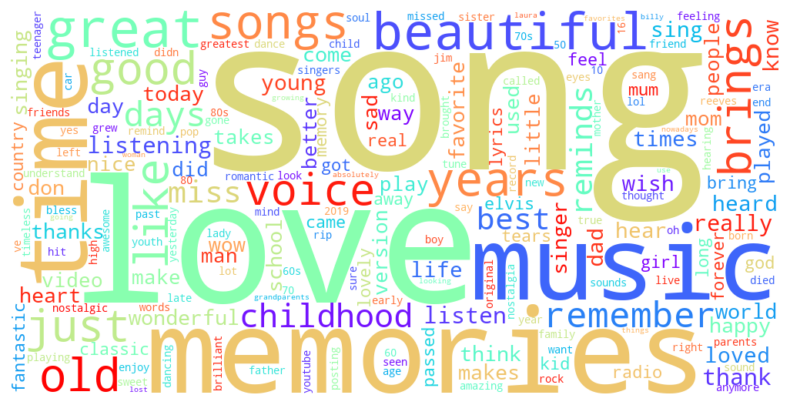

In [284]:
from wordcloud import WordCloud

terms = vectorizer.get_feature_names_out() # Get output feature names for transformation.
tfidf_scores = df_tfidf.toarray().sum(axis=0)  # Sum the tf-idf scores for each term across all documents


tfidf_dict = dict(zip(terms, tfidf_scores)) # Create a dictionary with terms as keys and tf-idf scores as values

# Create a word cloud using the tf-idf scores
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='rainbow'
).generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


Use TF-IDF to sort and visualize the top 20 words for each category:

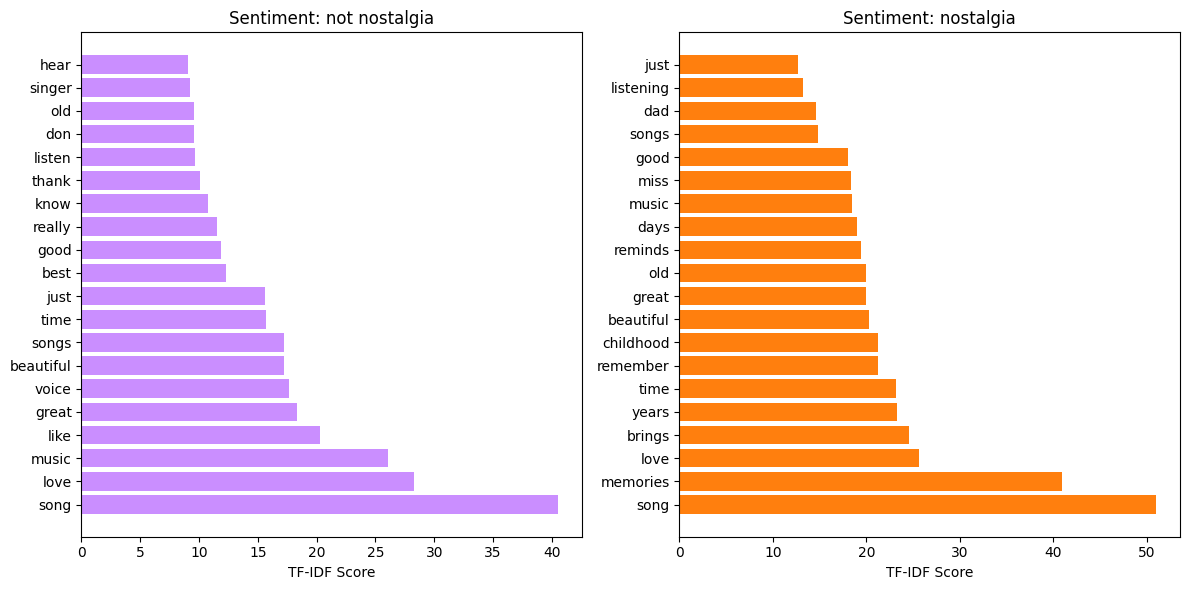

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# Define color list
col = ["#CA8EFF", "#ff7f0e"]

# Set figure size
plt.figure(figsize=(12, 6))

# Loop through each sentiment class
for idx, sentiment in enumerate(df['sentiment'].unique()):
    # Calculate TF-IDF
    df_tfidf = vectorizer.fit_transform(df[df['sentiment'] == sentiment]['comment'])
    tfidf_scores = df_tfidf.toarray().sum(axis=0)  # Sum scores for each feature
    
    # Get top 20 terms and scores
    reverse_order = np.argsort(tfidf_scores)[::-1]  # Sort TF-IDF scores
    top_terms = vectorizer.get_feature_names_out()[reverse_order[:20]]
    top_tfidf = tfidf_scores[reverse_order][:20]

    # Create a bar chart
    axs = plt.subplot(1, 2, idx + 1)  
    axs.barh(top_terms, top_tfidf, color=col[idx])  
    axs.set_title(f'Sentiment: {sentiment}')
    axs.set_xlabel('TF-IDF Score')

plt.tight_layout()
plt.show()




Comparing the top 20 words and their scores/frequencies for text vectorization using CountVectorizer vs. TfidfVectorizer

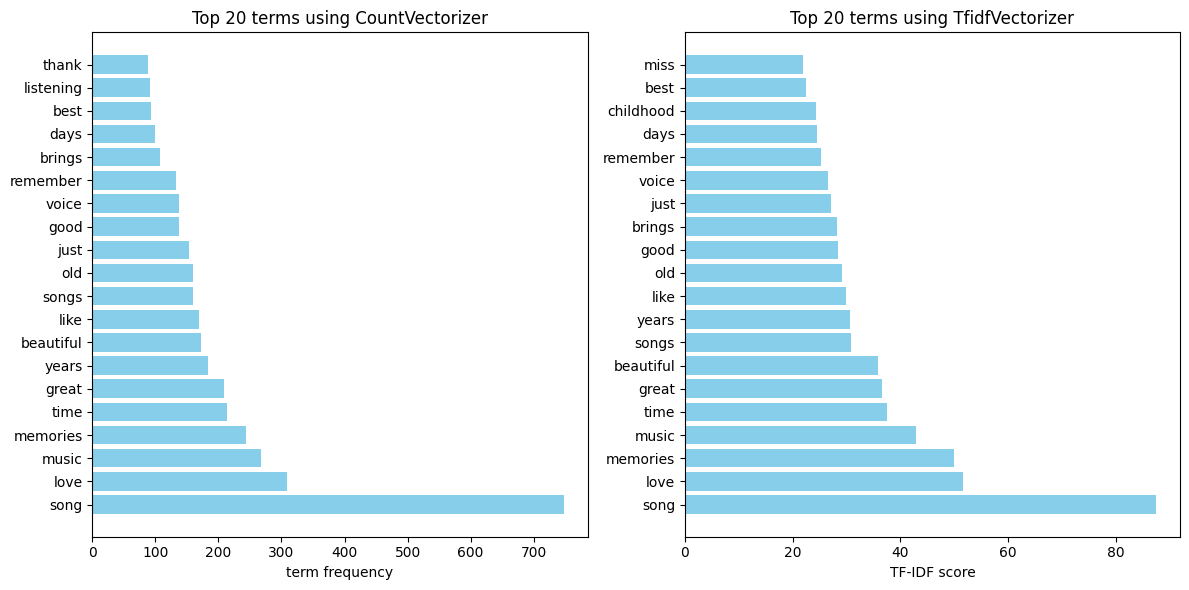

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



total_vectorizers = [CountVectorizer(stop_words='english'), TfidfVectorizer(stop_words='english')]
vectorizer_names = ['CountVectorizer', 'TfidfVectorizer']
text = ["term frequency","TF-IDF score"]
fig, axs = plt.subplots(1,2, figsize=(12, 6))

for i, vectorizer in enumerate(total_vectorizers):
    
    df_vectorized = vectorizer.fit_transform(df.comment)
    
    terms = vectorizer.get_feature_names_out()
    

    scores = df_vectorized.toarray().sum(axis=0)  #

    reverse_order = np.argsort(scores)[::-1]
    
    
    top_terms = terms[reverse_order[:20]]
    top_scores = scores[reverse_order][:20]

    axs[i].barh(top_terms, top_scores, color='skyblue')
    axs[i].set_title(f'Top 20 terms using {vectorizer_names[i]}')
    axs[i].set_xlabel(text[i])

plt.tight_layout()
plt.show()


###  Data Classification

In [285]:
from sklearn.naive_bayes import BernoulliNB

vectorizer = TfidfVectorizer(stop_words='english')
df_tfidf = vectorizer.fit_transform(df.comment) # learn the vocabulary and return document-term matrix
terms = vectorizer.get_feature_names_out() # Get output feature names for transformation.
tfidf_scores = df_tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf_scores, columns=terms,index=df.index )


# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
gnb_classifier = BernoulliNB()
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8733333333333333

Classification Report:
               precision    recall  f1-score   support

           0     0.8438    0.9270    0.8834       233
           1     0.9124    0.8157    0.8613       217

    accuracy                         0.8733       450
   macro avg     0.8781    0.8714    0.8724       450
weighted avg     0.8768    0.8733    0.8728       450

Accuracy: 0.8844444444444445

Classification Report:
               precision    recall  f1-score   support

           0     0.8521    0.9399    0.8939       233
           1     0.9275    0.8249    0.8732       217

    accuracy                         0.8844       450
   macro avg     0.8898    0.8824    0.8835       450
weighted avg     0.8885    0.8844    0.8839       450



The overall performance of the prediction models generated using TF-IDF features and Term Frequency features is quite similar.